In [136]:
# ploting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# deplyment libraries
import pickle
# import PreProcessing functions
import sys 
import os
sys.path.append(os.path.abspath("C:\\Users\\koriv\\Desktop\\MachineLearning_DataScience\\Hands_On_Machine_Learning\\my_env_codebasics\\My_CODE\\ML-projects\\NLP-Classification\\nlp_project\\preProcessing"))
from fake_News_Classifier_preProcessing import Transformations

# Importing required framework libraries
import pandas as pd
import numpy as np
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Evaluation Metrics
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, confusion_matrix, classification_report
from sklearn.metrics import recall_score,precision_score,f1_score, accuracy_score, balanced_accuracy_score
from sklearn.metrics import f1_score, fbeta_score, classification_report, make_scorer
from sklearn.metrics import roc_curve, roc_auc_score

# PreProcessing

In [137]:
#Import training features
import pathlib
path_to_read_model = '..\\probleam_study' #Path of current working Directory
with open(path_to_read_model + '\\testFeatures_list.pkl', 'rb') as f:
    X_test, y_test = pickle.load(f)

In [138]:
#Verify testing features columns match
import pathlib
path_to_read_model = '..\\encoding_scaling_imputation_modelling' #Path of current working Directory
with open(path_to_read_model + '\\feature_ColumnNames.pkl', 'rb') as f:
    feature_ColumnNames = pickle.load(f)

In [139]:
X_test.columns == feature_ColumnNames

array([ True,  True,  True,  True])

In [140]:
# Data PreProcessing
# Define a function to apply the imported functions
def preProcessing(featureDF, targetDF, function_list):
    for function in function_list:
        featureDF, targetDF = function(featureDF, targetDF)
    return featureDF, targetDF

X_test, y_test = preProcessing(X_test, y_test, [Transformations])

>>feature shape before cleaning:  (1456, 4)
>>target shape before cleaning:  (1456,)
>>feature shape after cleaning:  (1412, 1)
>>target shape after cleaning:  (1412,)
>>feature shape after preProcessing:  (1412, 1)
>>target shape after preProcessing:  (1412,)


# Encoding and Modeling

In [141]:
#Import Modelled features
import pathlib
path_to_read_model = '..\\encoding_scaling_imputation_modelling' #Path of current working Directory
with open(path_to_read_model + '\\estimators.pkl', 'rb') as f:
    best_algos, = pickle.load(f)
display(best_algos)
piep_BNP = best_algos['BernoulliNB_TfidfVectorizer']['best_estimator']

{'BernoulliNB_CountVectorizer': {'best_estimator': Pipeline(steps=[('textVec', CountVectorizer(ngram_range=(1, 2))),
                  ('scaler', None),
                  ('model', BernoulliNB(alpha=2, fit_prior=False))]),
  'best_mean_test_score': 0.9170658580863235},
 'MultinomialNB_CountVectorizer': {'best_estimator': Pipeline(steps=[('textVec',
                   CountVectorizer(max_features=15000, ngram_range=(1, 3))),
                  ('scaler', None),
                  ('model', MultinomialNB(alpha=1, fit_prior=False))]),
  'best_mean_test_score': 0.8861378107583524},
 'BernoulliNB_TfidfVectorizer': {'best_estimator': Pipeline(steps=[('textVec', TfidfVectorizer(ngram_range=(1, 2))),
                  ('scaler', None),
                  ('model', BernoulliNB(alpha=2, fit_prior=False))]),
  'best_mean_test_score': 0.9170658580863235},
 'MultinomialNB_TfidfVectorizer': {'best_estimator': Pipeline(steps=[('textVec',
                   TfidfVectorizer(max_features=15000, ngram_range

In [142]:
#Predictions for Test Data
y_testpred = piep_BNP.predict(X_test.title)
y_testpred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

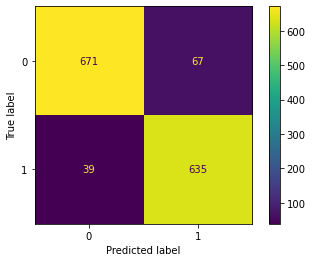

In [143]:
# Confusion Matrix
plot_confusion_matrix(piep_BNP, X_test.title, y_test)
## FN are 39 which should be 1
## FP are 67 which should be 0
## goal is to minimize the FP, so as real news are not classified as fake news. 
## So, we need to increase Precision or Specificity and reduce recall.

In [144]:
# Precision score
## high Precision implies low False positives
print("individual precision score: ",precision_score(y_test,y_testpred,average=None))
print("weighted average precision score: ",precision_score(y_test,y_testpred,average='weighted'))
print("normal/binary average precision score: ",precision_score(y_test,y_testpred,average='macro'))

individual precision score:  [0.94507042 0.9045584 ]
weighted average precision score:  0.9257325329343843
normal/binary average precision score:  0.9248144135468079


In [145]:
# Recall score
## high Precision implies low False negatives
print("individual recall score: ",recall_score(y_test,y_testpred,average=None))
print("weighted average recall score: ",recall_score(y_test,y_testpred,average='weighted'))
print("normal/binary recall precision score: ",recall_score(y_test,y_testpred,average='macro'))

individual recall score:  [0.90921409 0.9421365 ]
weighted average recall score:  0.9249291784702549
normal/binary recall precision score:  0.9256752953286209


In [146]:
# Accuracy and balanced Accuracy
print("accuracy: ",accuracy_score(y_test,y_testpred))
print("Balanced accuracy: ",balanced_accuracy_score(y_test,y_testpred))

accuracy:  0.9249291784702549
Balanced accuracy:  0.9256752953286209


In [147]:
# F1 score and F-Beta score
print("normal F1 score: ",f1_score(y_test,y_testpred, average='macro'))
print("normal F-beta score at beta 0.75: ",fbeta_score(y_test,y_testpred, beta=0.75, average='macro'))
print("weighted F1 score: ",f1_score(y_test,y_testpred, average='weighted'))
print("weighted F-beta score at beta 0.75: ",fbeta_score(y_test,y_testpred, beta=0.75, average='weighted'))

normal F1 score:  0.9248803481947834
normal F-beta score at beta 0.75:  0.924788530517331
weighted F1 score:  0.9249671575733994
weighted F-beta score at beta 0.75:  0.9251081849557946


In [148]:
# classification_report
print(classification_report(y_test,y_testpred, target_names=['News', 'Fake_news'], digits=2, 
                      output_dict=False, zero_division='warn'))

              precision    recall  f1-score   support

        News       0.95      0.91      0.93       738
   Fake_news       0.90      0.94      0.92       674

    accuracy                           0.92      1412
   macro avg       0.92      0.93      0.92      1412
weighted avg       0.93      0.92      0.92      1412



# Adjusting the Threshold using prediction Probability

In [149]:
print(">predictions for frist 10 features: \n",piep_BNP.predict(X_test.title)[:10])
print(">prediction propabilities for frist 10 features: \n",piep_BNP.predict_proba(X_test.title)[:10, :])
print(">prediction propabilities for positive class for frist 10 features: \n",piep_BNP.predict_proba(X_test.title)[:10, 1])

>predictions for frist 10 features: 
 [1 0 1 1 1 1 0 0 0 0]
>prediction propabilities for frist 10 features: 
 [[0.03480822 0.96519178]
 [0.92840903 0.07159097]
 [0.02762973 0.97237027]
 [0.03198629 0.96801371]
 [0.07063552 0.92936448]
 [0.0050098  0.9949902 ]
 [0.91670805 0.08329195]
 [0.72111694 0.27888306]
 [0.99587179 0.00412821]
 [0.87928185 0.12071815]]
>prediction propabilities for positive class for frist 10 features: 
 [0.96519178 0.07159097 0.97237027 0.96801371 0.92936448 0.9949902
 0.08329195 0.27888306 0.00412821 0.12071815]


Text(0, 0.5, 'Frequency')

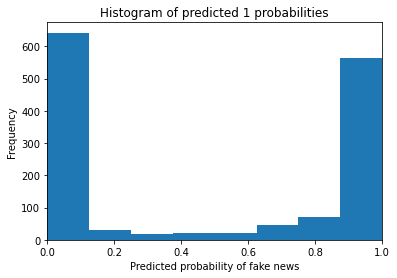

In [150]:
# store the predicted probabilities for class 1
y_pred_prob1 = piep_BNP.predict_proba(X_test.title)[:, 1]
# histogram of predicted probabilities
plt.hist(y_pred_prob1, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted 1 probabilities')
plt.xlabel('Predicted probability of fake news')
plt.ylabel('Frequency')

In [151]:
# At probability of 0.6 there was sharp increase in the confidence. 
# So if we make a cut of at 0.6 instead of 0.5 to reduce positves.

In [152]:
# Decreasing the Threshold
y_pred_prob1

array([9.65191784e-01, 7.15909724e-02, 9.72370268e-01, ...,
       3.87292888e-12, 9.98694608e-01, 1.64247101e-01])

In [153]:
# predict positive if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_new = binarize([y_pred_prob1], threshold=0.90)[0]

In [154]:
y_pred_new

array([1., 0., 1., ..., 0., 1., 0.])

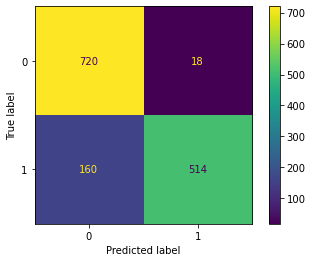

In [155]:
# Custom confusion matrix without estimator
class MyModelPredict(object):
    def __init__(self, model):
        self._estimator_type = 'classifier'        
    def predict(self, X):
        return y_pred_new
model = MyModelPredict('model')
plot_confusion_matrix(model, X_test, y_test)

# Tuning Threshold based on Precision

In [156]:
# Precision Recall Curve
precision, recall, threshold = precision_recall_curve(y_test, piep_BNP.predict_proba(X_test.title)[:, 1])
#!pip install plotly
import plotly.express as px
fig = px.line(x=recall[:-1], y = precision[:-1], hover_name=threshold)
fig.update_xaxes(title="Recall")
fig.update_yaxes(title="Precision")
fig

In [161]:
# Adjust Threshold
## threshold to ensure that 97% of the positive mails are classified crroectly amongest total positive prediction 
## => Precision = 0.97 instead of current 0.92
pre95_ind = np.argmin(precision <= 0.97) #Index Last occurance of recall value >=0.95

In [162]:
pre95_thresh = threshold[pre95_ind] #Threshold for that recall index
# Precision and recall for the given index
pre95_precision = precision[pre95_ind]
pre95_recall = recall[pre95_ind]

In [163]:
print("Threshold:", pre95_thresh)
print("Precision:", pre95_precision)
print("Recall:", pre95_recall)

Threshold: 0.9360006612528129
Precision: 0.971252566735113
Recall: 0.701780415430267
